# Question1
- Prove if Zipf’s Law works in Natural Language or not.


In [1]:
from glob import glob
import re
import glob
import csv
import matplotlib.pyplot as plt

total_words =[] #Initialize an array
words_freq = {}      # Initilize dictionary for word frequency
words_freq1 = {}    # Initilize dictionary for word frequency in function
top_words ={}       # Initilize dictionary for word frequency order 
rank =[]            #Initialize an array for storing results from csv file 
frequency =[]        #Initialize an array for storing results from csv file 

fig = plt.figure()          #Setting the figure to plot
ax = fig.add_subplot(111)
ax.set_xscale("log")        #Setting the x axis to plot
ax.set_yscale("log")        #Setting the y axis to plot

ax.set_xlim(1e0, 1e4)      #Setting the x axis limit from start to end
ax.set_ylim(1e0, 1e4)      #Setting the y axis limit from start to end
ax.set_aspect(1)
ax.set_title("Calculation Results")      #Setting the title to the figure



In [2]:
def newFile(files):                       # function to get all words from passed file
    for file in files: 
        f=open(file, 'r') 
        for line in f:
            for word in re.sub("[^\w]", " ",  line).split():
                total_words.append(word.lower())
    f.close()
    return total_words

files = glob.glob('C://nltk_data//corpora//gutenberg//austen-persuasion.txt')  #opening the file from location
words_file =newFile(files)                      #calling the function to get all words from file


In [3]:
def wordcount(words_file):               # function to check word frequency and add in a dictionary
     for i in words_file:         
        if i in words_freq1:
            words_freq1[i]+=1
        else:
            words_freq1[i]=1
     return  words_freq1    


words_freq =wordcount(words_file)              #calling the function to get word frequency


In [4]:
top_words = sorted(words_freq, key=lambda k: words_freq[k], reverse=True) #sorting the word based on freq in decending order


In [5]:
count=0
with open('wordRank.csv','w',newline='') as fp:         #Creating csv file and writing word,rank and frequecncy from result
    writer=csv.writer(fp)
    writer.writerow( ('Word', 'Rank', 'Frequency') )
    for i in top_words:
        count=count+1
        writer.writerow((i ,count,words_freq[i]))  

fp.close()        
        

In [6]:
with open('wordRank.csv', 'r') as f:   #Reading csv file and adding all ranks and frequencies in an array
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:  
        rank.append(row[1])
        frequency.append(row[2])

f.close()        

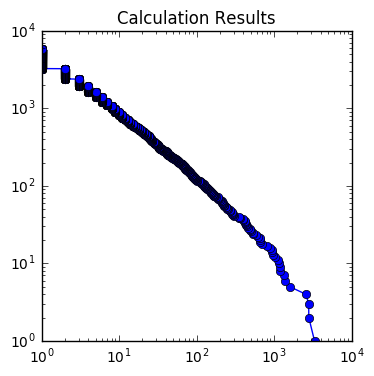

In [7]:
ax.plot(frequency, rank, "o-")          #Ploting rank against frequency graph with array results stored
plt.draw()
plt.show()

#Conclusion : most frequently occurring word 'the' in a text appears twice as often as the next most frequent word 'to'.
